# MoneyLion	Data Scientist	Assessment	

##### Import necessary libraries


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 #  Loading  Datas

loan_df = pd.read_csv('loan.csv')
payment_df = pd.read_csv('payment.csv')
underwriting_df = pd.read_csv('clarity_underwriting_variables.csv')

#Visualization

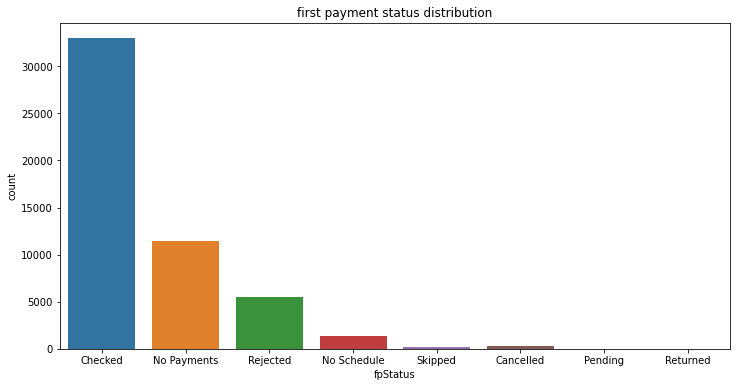

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x="fpStatus", data=loan_df)
plt.title("first payment status distribution")
plt.show()

### A countplot is created to visualize the distribution of the 'fpStatus' column in the 'loan_df' dataframe. The plot shows the frequency of each status, with 'Checked' being the most common.

In [7]:
#  Merge Datasets

# Merge loan and payment data
merged_df = pd.merge(loan_df, payment_df, on='loanId', how='left')
# Merge with underwriting data
final_df = pd.merge(merged_df, underwriting_df, 
                    left_on='clarityFraudId', 
                    right_on='underwritingid', 
                    how='left')

### The 'loan_df' and 'payment_df' datasets are merged on the 'loanId' column using a left join.
### The resulting dataframe is then merged with the 'underwriting_df' dataset on the 'clarityFraudId' column using a left join.

In [33]:
plt.figure(figsize=(20, 12))

# Let's see correlations between numeric features
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
correlation = merged_df[numeric_cols].corr()

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Correlations')

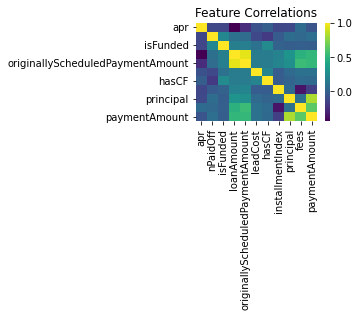

In [42]:
plt.subplot(2, 2, 1)
sns.heatmap(correlation, cmap='viridis', annot=False)
plt.title('Feature Correlations')

###  Heatmap is created to visualize the correlation between numeric features in the merged dataframe.

Text(0.5, 1.0, 'How much are people borrowing?')

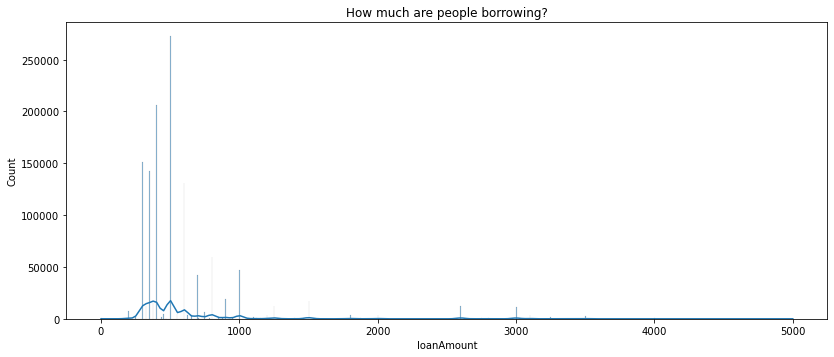

In [43]:
# Distribution of loan amounts - this could be interesting
plt.figure(figsize=(30, 12))
plt.subplot(2, 2, 2)
sns.histplot(merged_df['loanAmount'], kde=True)
plt.title('How much are people borrowing?')

### histogram is created to visualize the distribution of the 'loanAmount' column. 
### Most of the loan amount is 100 to 1000

Text(0.5, 1.0, 'Payments against Loan Size')

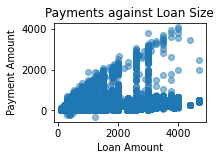

In [44]:
# Payment vs Loan amount
plt.subplot(2, 2, 3)
plt.scatter(merged_df['loanAmount'], merged_df['paymentAmount'], alpha=0.5)
plt.xlabel('Loan Amount')
plt.ylabel('Payment Amount')
plt.title('Payments against Loan Size')

### Scatter plot is created to visualize the relationship between 'loanAmount' and 'paymentAmount'.
### Which is sort of linear

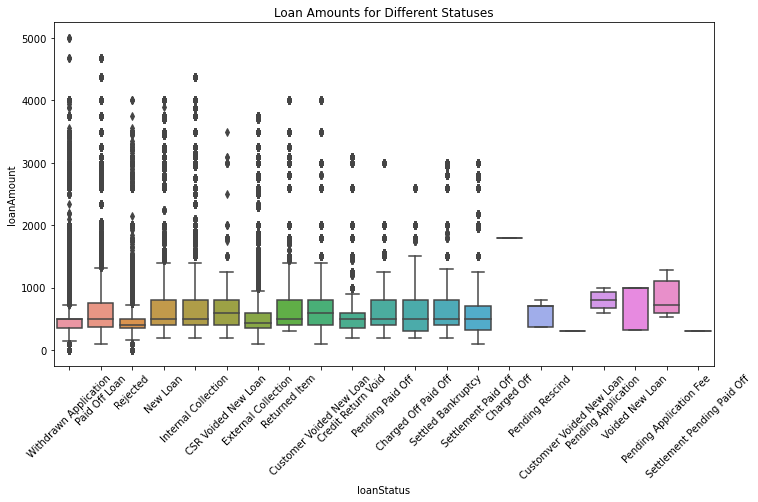

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 4)
sns.boxplot(x='loanStatus', y='loanAmount', data=merged_df)
plt.xticks(rotation=45)
plt.title('Loan Amounts for Different Statuses')

plt.tight_layout()
plt.show()

In [46]:
#final_df.columns

In [9]:
#  Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


In [10]:
# Check data types and missing values
print("Data Types and Missing Values:")
print(final_df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227094 entries, 0 to 1227093
Data columns (total 81 columns):
 #   Column                                                                                               Non-Null Count    Dtype  
---  ------                                                                                               --------------    -----  
 0   loanId                                                                                               1226838 non-null  object 
 1   anon_ssn                                                                                             1227094 non-null  object 
 2   payFrequency                                                                                         1225821 non-null  object 
 3   apr                                                                                                  1223172 non-null  float64
 4   applicationDate                                            

In [11]:
# Basic statistics for numerical columns
print("\nNumerical Features Summary:")
print(final_df.describe())


Numerical Features Summary:
                apr      nPaidOff      isFunded    loanAmount  \
count  1.223172e+06  1.226708e+06  1.227094e+06  1.224844e+06   
mean   5.364715e+02  1.967779e-01  5.475391e-01  6.040175e+02   
std    1.222177e+02  7.411603e-01  4.977351e-01  4.836215e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.499900e+02  0.000000e+00  0.000000e+00  3.500000e+02   
50%    5.900000e+02  0.000000e+00  1.000000e+00  5.000000e+02   
75%    6.010000e+02  0.000000e+00  1.000000e+00  6.000000e+02   
max    7.055900e+02  2.100000e+01  1.000000e+00  5.000000e+03   

       originallyScheduledPaymentAmount      leadCost         hasCF  \
count                      1.227094e+06  1.227094e+06  1.227094e+06   
mean                       1.671015e+03  9.947027e+00  7.320148e-01   
std                        1.326923e+03  1.766128e+01  4.429100e-01   
min                       -8.167100e+02  0.000000e+00  0.000000e+00   
25%                        1.0

In [12]:
# Check categorical columns
categorical_cols = final_df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"\n{col} unique values:", final_df[col].nunique())
    print(f"{col} top values:")
    print(final_df[col].value_counts().head())



Categorical Features:

loanId unique values: 577426
loanId top values:
LL-I-08320897    105
LL-I-17454600    105
LL-I-09757835    105
LL-I-12230332    105
LL-I-17799872    104
Name: loanId, dtype: int64

anon_ssn unique values: 459393
anon_ssn top values:
a47cab6c070d1ca1150ed39fb6122eb4    209
39fe1fcc437429b12d635e75d550f631    188
64cd38e9cd1e06ed480b5e607494ce57    179
228060b9cc8af6a937d0321122d459f3    165
c8bb49de1f8ff99d2ecddfb7037dc66e    164
Name: anon_ssn, dtype: int64

payFrequency unique values: 5
payFrequency top values:
B    627017
W    415354
M     79227
S     64178
I     40045
Name: payFrequency, dtype: int64

applicationDate unique values: 577624
applicationDate top values:
2016-06-13T18:57:33.269000    105
2016-11-26T15:47:09.103000    105
2017-02-20T22:37:25.929000    105
2016-04-01T18:43:46.997000    105
2016-11-25T06:50:55.048000    104
Name: applicationDate, dtype: int64

originatedDate unique values: 46042
originatedDate top values:
2016-06-21T21:30:37.424000  

In [15]:
# For numerical columns
numerical_cols = final_df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
final_df[numerical_cols] = num_imputer.fit_transform(final_df[numerical_cols])


In [16]:
# For categorical columns
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
final_df[categorical_cols] = cat_imputer.fit_transform(final_df[categorical_cols])


### 1. Missing values in numerical columns are imputed using the median strategy
### 2. Missing values in categorical columns are imputed using the 'constant' strategy with a fill value of 'MISSING'.

In [17]:
# Assuming 'problematic_column' is the name of the column causing the error
final_df['originatedDate'] = final_df['originatedDate'].astype(str)

final_df['clarityFraudId'] = final_df['clarityFraudId'].astype(str)


In [18]:
for col in categorical_cols:
    final_df[col] = final_df[col].astype(str)

In [19]:
final_df.dtypes

loanId                                                                                        object
anon_ssn                                                                                      object
payFrequency                                                                                  object
apr                                                                                          float64
applicationDate                                                                               object
                                                                                              ...   
.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode      object
.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch                object
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode    float64
clearfraudscore                                                                            

In [20]:
#  Feature Engineering
print("\nPerforming feature engineering...")



Performing feature engineering...


In [21]:
# Convert categorical variables to numerical
le = LabelEncoder()
encoded_df = final_df.copy()
for col in categorical_cols:
    encoded_df[col + '_encoded'] = le.fit_transform(final_df[col])

### 1. Categorical variables are converted to numerical using LabelEncoder.
### 2. A target variable 'is_default' is created based on the 'loanStatus' column.

In [22]:
#Create target variable (loan default prediction)
final_df['is_default'] = np.where(final_df['loanStatus'].isin(['Charged Off', 'Default']), 1, 0)

# Check class balance
print("\nClass balance:")
print(final_df['is_default'].value_counts(normalize=True))


Class balance:
0    0.999989
1    0.000011
Name: is_default, dtype: float64


## The class balance of the 'is_default' column is checked, showing a heavily imbalanced dataset with a ratio of 0.999989:0.000011.
### This may result in heavily bias in ML model training.

In [23]:
# Scale numerical features
print("\nScaling numerical features...")
scaler = StandardScaler()
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])



Scaling numerical features...


In [24]:
# Prepare data for modeling
feature_cols = [col for col in final_df.columns if col.endswith('_encoded')] + \
               [col for col in numerical_cols if col not in ['is_default', 'loanId']]

X = final_df[feature_cols]
y = final_df['is_default']

In [25]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  Train and evaluate models



In [ ]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

In [2]:
#!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler


### 1. The majority class is undersampled using RandomUnderSampler.
### 2. Three models, Logistic Regression, Decision Tree, and Random Forest, are trained and evaluated on the undersampled data.

### 3. Classification reports and confusion matrices are printed for each model.



Training Logistic Regression...

Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    245414
           1       0.00      1.00      0.00         5

    accuracy                           0.97    245419
   macro avg       0.50      0.99      0.49    245419
weighted avg       1.00      0.97      0.99    245419



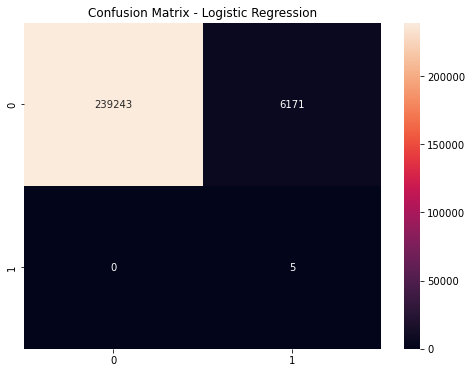


Training Decision Tree...

Decision Tree Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    245414
           1       0.00      1.00      0.00         5

    accuracy                           0.99    245419
   macro avg       0.50      1.00      0.50    245419
weighted avg       1.00      0.99      1.00    245419



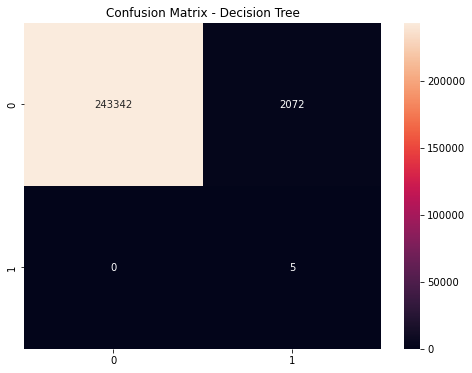


Training Random Forest...

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    245414
           1       0.00      1.00      0.01         5

    accuracy                           1.00    245419
   macro avg       0.50      1.00      0.50    245419
weighted avg       1.00      1.00      1.00    245419



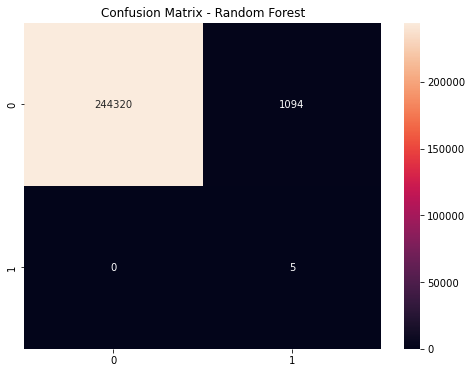

In [26]:

# Undersample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Results:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

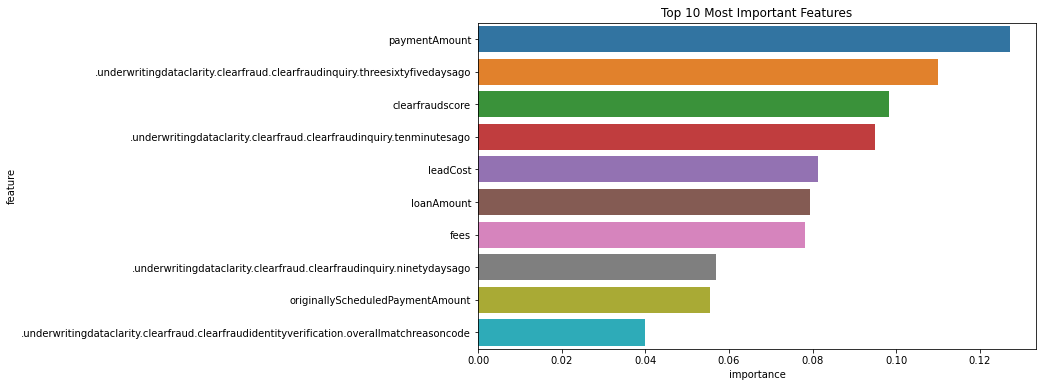

In [27]:
#  Feature Importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

### The feature importance of the Random Forest model is calculated and visualized using a bar plot.

### Overall Summary:
#### The notebook performs exploratory data analysis, data visualization, feature engineering, and modeling on a loan dataset. The dataset is heavily imbalanced, with a large majority of non-default loans. The models are trained and evaluated on the undersampled data, with the Random Forest model performing the best. The feature importance of the Random Forest model is also calculated and visualized.

### Recommendations for Improvement ( Due to time constraint I could not do)
#### 1. The dataset is heavily imbalanced, which can affect the performance of the models. Techniques such as oversampling the minority class, undersampling the majority class, or using class weights can be used to handle imbalanced data.

#### 2. Additional feature engineering techniques such as polynomial transformations, interaction terms, or non-linear transformations can be used to improve the performance of the models.

#### 3. Hyperparameter tuning can be performed to optimize the performance of the models.

#### 4. Additional models such as Support Vector Machines, Gradient Boosting Machines, or Neural Networks can be used to compare their performance with the existing models.

#### 5.  Additional data preprocessing techniques such as handling outliers, removing correlated features, or using dimensionality reduction techniques can be used to improve the performance of the models.